In [51]:
!pip install tensorflow

In [52]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()


In [54]:
# Show a few sample rows of input and output
print("Sample input features (first 5 rows):")
print(x_train[:5])

print("\nCorresponding target house prices:")
print(y_train[:5])

Sample input features (first 5 rows):
[[1.23247e+00 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01 6.14200e+00
  9.17000e+01 3.97690e+00 4.00000e+00 3.07000e+02 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 0.00000e+00 4.15000e-01 7.61000e+00
  1.57000e+01 6.27000e+00 2.00000e+00 3.48000e+02 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.31000e-01 4.97000e+00
  1.00000e+02 1.33250e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.75520e+02
  3.26000e+00]
 [3.96100e-02 0.00000e+00 5.19000e+00 0.00000e+00 5.15000e-01 6.03700e+00
  3.45000e+01 5.98530e+00 5.00000e+00 2.24000e+02 2.02000e+01 3.96900e+02
  8.01000e+00]
 [3.69311e+00 0.00000e+00 1.81000e+01 0.00000e+00 7.13000e-01 6.37600e+00
  8.84000e+01 2.56710e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.91430e+02
  1.46500e+01]]

Corresponding target house prices:
[15.2 42.3 50.  21.1 17.7]


In [55]:
# Normalize input features
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [56]:
# Build the model
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Regression output
])

In [57]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [58]:
# Train the model and store the history
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, batch_size=16, verbose=1)

Epoch 1/100
21/21 [==============================] - 1s 15ms/step - loss: 516.1891 - mae: 20.7541 - val_loss: 504.6201 - val_mae: 20.4556
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 313.5218 - mae: 15.2934 - val_loss: 193.6116 - val_mae: 11.5479
Epoch 3/100
21/21 [==============================] - 0s 5ms/step - loss: 90.9602 - mae: 7.4994 - val_loss: 63.3239 - val_mae: 6.2328
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 43.5958 - mae: 4.8429 - val_loss: 35.2271 - val_mae: 4.4257
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 27.0006 - mae: 3.7151 - val_loss: 24.6326 - val_mae: 3.8457
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 21.9187 - mae: 3.3331 - val_loss: 21.5619 - val_mae: 3.5614
Epoch 7/100
21/21 [==============================] - 0s 5ms/step - loss: 19.1108 - mae: 3.0620 - val_loss: 19.6103 - val_mae: 3.3808
Epoch 8/100
21/21 [==============================] - 0s 5ms/

21/21 [==============================] - 0s 5ms/step - loss: 5.2081 - mae: 1.6013 - val_loss: 12.4641 - val_mae: 2.4292
Epoch 63/100
21/21 [==============================] - 0s 4ms/step - loss: 5.0332 - mae: 1.5297 - val_loss: 12.8606 - val_mae: 2.4006
Epoch 64/100
21/21 [==============================] - 0s 5ms/step - loss: 5.3483 - mae: 1.6398 - val_loss: 14.9000 - val_mae: 2.4405
Epoch 65/100
21/21 [==============================] - 0s 5ms/step - loss: 5.6740 - mae: 1.6869 - val_loss: 14.4726 - val_mae: 2.4700
Epoch 66/100
21/21 [==============================] - 0s 5ms/step - loss: 5.1765 - mae: 1.5334 - val_loss: 13.2188 - val_mae: 2.4498
Epoch 67/100
21/21 [==============================] - 0s 5ms/step - loss: 5.4041 - mae: 1.6466 - val_loss: 13.3926 - val_mae: 2.5050
Epoch 68/100
21/21 [==============================] - 0s 5ms/step - loss: 4.9544 - mae: 1.5809 - val_loss: 12.9814 - val_mae: 2.4124
Epoch 69/100
21/21 [==============================] - 0s 5ms/step - loss: 4.5916 -

In [59]:

# Evaluate the model
loss, mae = model.evaluate(x_test, y_test)
print(f"\nTest Mean Absolute Error: {mae:.2f}")

4/4 [==============================] - 0s 3ms/step - loss: 18.0127 - mae: 2.7377

Test Mean Absolute Error: 2.74


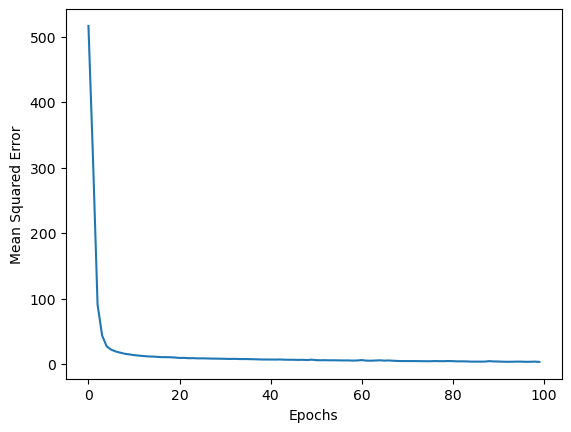

In [60]:
# Plot only training loss without legend or title
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

In [61]:
mse,mae = model.evaluate(x_test,y_test)
print('MSE : ',mse)
print('MAE : ',mae)

4/4 [==============================] - 0s 3ms/step - loss: 18.0127 - mae: 2.7377
MSE :  18.012683868408203
MAE :  2.737741470336914


In [62]:
y1 = model.predict(x_test[:])

4/4 [==============================] - 0s 3ms/step


In [63]:
y_test

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])